In [619]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [620]:
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

os.getcwd()

'E:\\analytics_assignment'

In [621]:
os.chdir("E:\\analytics_assignment")

In [622]:
data=pd.read_excel("creditcard.xls",header=1)

In [623]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [624]:
data.rename({"default payment next month":"Default"},inplace=True,axis=1)
data.columns[-1]

'Default'

In [625]:
Tot_counts=data.shape[0]

## Binning based on credit limit

In [626]:
data["LIMIT_BAL_bin"]=pd.qcut(data.LIMIT_BAL, q=4,precision=1,duplicates="drop")
labels=["L1","L2","L3","L4"]
data["LIMIT_BAL_bin_lbl"]=pd.qcut(data.LIMIT_BAL, q=4,precision=1,duplicates="drop",labels=labels)

data[["LIMIT_BAL","LIMIT_BAL_bin","LIMIT_BAL_bin_lbl"]].head()

,LIMIT_BAL,LIMIT_BAL_bin,LIMIT_BAL_bin_lbl
0,20000,"(9999.9, 50000.0]",L1
1,120000,"(50000.0, 140000.0]",L2
2,90000,"(50000.0, 140000.0]",L2
3,50000,"(9999.9, 50000.0]",L1
4,50000,"(9999.9, 50000.0]",L1


In [627]:
Pop_counts_withlbl=pd.value_counts(data.LIMIT_BAL_bin_lbl,sort=False)
Pop_counts=pd.value_counts(data.LIMIT_BAL_bin,sort=False)
default=data[data.Default==1]
default_counts_bins=pd.value_counts(default.LIMIT_BAL_bin,sort=False)

In [628]:
bad_rate=default_counts_bins/Pop_counts
bad_rate

(9999.9, 50000.0]        0.317874
(50000.0, 140000.0]      0.247176
(140000.0, 240000.0]     0.173492
(240000.0, 1000000.0]    0.139805
Name: LIMIT_BAL_bin, dtype: float64

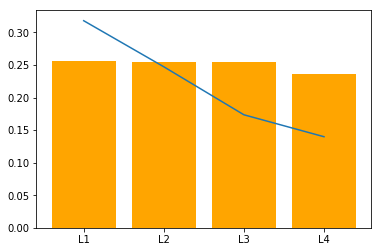

In [629]:
fig = plt.figure()
ax = fig.gca()

ax.bar(labels, Pop_counts/Tot_counts,color="orange")
ax.plot(labels, bad_rate)

plt.show()


## Binning based on Age 

In [630]:
labels=["A1","A2","A3","A4"]
data["Age_bin_lbl"]=pd.qcut(data.AGE, q=4,precision=1,duplicates="drop",labels=labels)
data["Age_bin"]=pd.qcut(data.AGE, q=4,precision=1,duplicates="drop")

In [631]:
Pop_counts=pd.value_counts(data.Age_bin,sort=False)
Pop_counts_withlbl=pd.value_counts(data.Age_bin_lbl,sort=False)
default=data[data.Default==1]
default_counts_bins=pd.value_counts(default.Age_bin,sort=False)

In [632]:
Pop_counts

(20.9, 28.0]    8013
(28.0, 34.0]    7683
(34.0, 41.0]    6854
(41.0, 79.0]    7450
Name: Age_bin, dtype: int64

In [633]:
bad_rate=default_counts_bins/Pop_counts

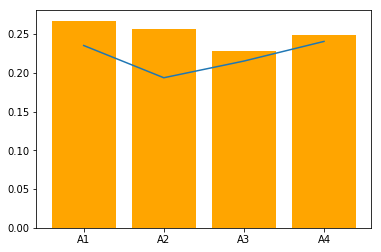

In [634]:
fig = plt.figure()
ax = fig.gca()

ax.bar(labels, Pop_counts/Tot_counts,color="orange")
ax.plot(labels, bad_rate)

plt.show()

### Rebinning based on Age

 (20.9, 28.0]
 (28.0, 34.0]
 (34.0, 41.0]
 (41.0, 79.0]

In [635]:
bins=[20.9, 34.0, 41.0, 79.0]

In [636]:
labels=["A1","A2","A3"]
data["Age_bin2_lbl"]=pd.qcut(data.AGE, q=3,precision=1,duplicates="drop",labels=labels)
data["Age_bin2"]=pd.qcut(data.AGE, q=3,precision=1,duplicates="drop")

In [637]:
Pop_counts=pd.value_counts(data.Age_bin2,sort=False)
Pop_counts_withlbl=pd.value_counts(data.Age_bin2_lbl,sort=False)
default=data[data.Default==1]
default_counts_bins=pd.value_counts(default.Age_bin2,sort=False)

In [638]:
bad_rate=default_counts_bins/Pop_counts

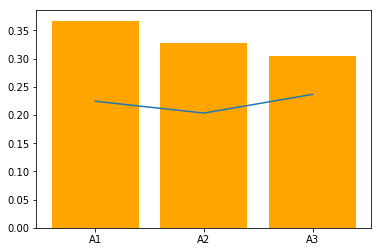

In [639]:
fig = plt.figure()
ax = fig.gca()

ax.bar(labels, Pop_counts/Tot_counts,color="orange")
ax.plot(labels, bad_rate)

plt.show()

## Bad Rate of categorical variables

### Gender

In [640]:
data.SEX = data.SEX.astype('category',copy=False)

In [641]:
Pop_counts=pd.value_counts(data.SEX,sort=False)
default_counts_bins=pd.value_counts(default.SEX,sort=False)
bad_rate=default_counts_bins/Pop_counts

In [642]:
bad_rate

1    0.241672
2    0.207763
Name: SEX, dtype: float64

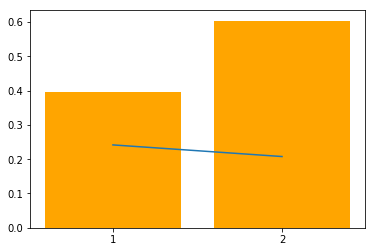

In [643]:
fig = plt.figure()
ax = fig.gca()

ax.bar(["1","2"], Pop_counts/Tot_counts,color="orange")
ax.plot(["1","2"], bad_rate)

plt.show()

### Education

In [644]:
Pop_counts=pd.value_counts(data.EDUCATION,sort=False)
default_counts_bins=pd.value_counts(default.EDUCATION,sort=True)
bad_rate=default_counts_bins/Pop_counts

In [645]:
bad_rate.dropna()

1    0.192348
2    0.237349
3    0.251576
4    0.056911
5    0.064286
6    0.156863
Name: EDUCATION, dtype: float64

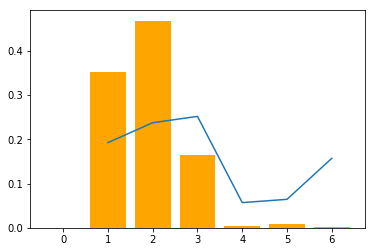

In [646]:
fig = plt.figure()
ax = fig.gca()

ax.bar(bad_rate.index.values, Pop_counts/Tot_counts,color="orange")
ax.plot(bad_rate.index.values, bad_rate)

plt.show()

### Rebinning Education

In [647]:
data["Edu"]=data.EDUCATION.apply(lambda x:  3 if ((x==0) or(x==3) or (x==4) or (x==5) or (x==6)) else x)
default=data[data.Default==1]

Pop_counts=pd.value_counts(data.Edu,sort=False)
default_counts_bins=pd.value_counts(default.Edu,sort=False)
pop_perc=Pop_counts/Tot_counts
bad_rate=(default_counts_bins/Pop_counts).dropna()

In [648]:
df=pd.concat([pop_perc,bad_rate],axis=1,ignore_index=True)

df=df.reset_index(drop=False).sort_values(by=1)
df.columns=["order","Edu_pop","Edu_bad"]
df=df.reset_index(drop=True)

df.order=pd.Categorical(df.order)

In [649]:
df

,order,Edu_pop,Edu_bad
0,1,0.352833,0.192348
1,3,0.179500,0.235840
2,2,0.467667,0.237349


In [650]:
x=np.array(df.order)
y=np.array(df.Edu_pop)
y2=np.array(df.Edu_bad)

In [651]:
fig = plt.figure()
ax = fig.gca()

In [652]:
#### this is trick to reorder the bars in matplotlib which otherwise plots them in alphabetically or increasing order

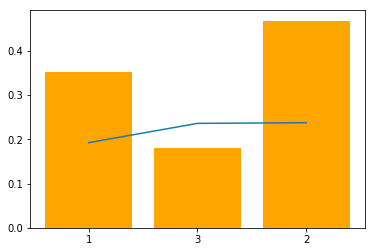

In [653]:
plt.xticks(range(len(x)), x)
ax.bar(range(len(x)),y,color="orange")
ax.plot(range(len(x)),y2)

plt.show()

### Marriage 

In [654]:
Pop_counts=pd.value_counts(data.MARRIAGE,sort=False)
default_counts_bins=pd.value_counts(default.MARRIAGE,sort=False)
bad_rate=default_counts_bins/Pop_counts

bad_rate

0    0.092593
1    0.234717
2    0.209283
3    0.260062
Name: MARRIAGE, dtype: float64

In [655]:
fig = plt.figure()
ax = fig.gca()

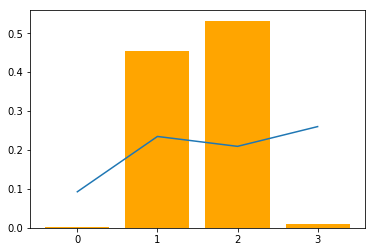

In [656]:
ax.bar(["0","1","2","3"], pd.value_counts(data.MARRIAGE,sort=False)/data.LIMIT_BAL.count(),color="orange")
ax.plot(["0","1","2","3"],bad_rate)

plt.show()

## Binning based on Utilisation

### MonthWise and Avg

In [657]:
Bills=data.iloc[:,12:18]
Bills["LIMIT_BAL"]=data["LIMIT_BAL"]

Bills.iloc[:,0:-1].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


### MonthWise

In [658]:
Bills=Bills.apply(lambda x:x/x["LIMIT_BAL"],axis=1).drop(["LIMIT_BAL"],axis=1)
Bills.head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175
2,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767


### Avg Utilisation

In [659]:
Bills["Avg_Use"]=Bills.apply(lambda x:sum(x)/6,axis=1)
Bills.head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Avg_Use
0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.064200
1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.023718
2,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.188246


### There are 201 cases of -ve utilisation

In [660]:
Bills[Bills.Avg_Use<0].head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Avg_Use
26,-0.001817,-0.007083,0.004317,-0.000950,0.002117,-0.003150,-0.001094
109,-0.000286,-0.000286,-0.000286,-0.000286,-0.000286,-0.000286,-0.000286
173,-0.014180,-0.014180,-0.014180,-0.057960,-0.065440,-0.065440,-0.038563


In [661]:
data.iloc[[26,109,173],12:18]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
26,-109,-425,259,-57,127,-189
109,-103,-103,-103,-103,-103,-103
173,-709,-709,-709,-2898,-3272,-3272


### Replacing -Ve bill amount with paid amount

In [662]:
paid_value_ng_utilisation=data.iloc[Bills[Bills.Avg_Use<0].index.values,18:24]
paid_value_ng_utilisation.columns=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
data.iloc[Bills[Bills.Avg_Use<0].index.values,12:18]=paid_value_ng_utilisation.iloc[:,0:6]

In [663]:
data.iloc[Bills[Bills.Avg_Use<0].index.values,12:18].head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
26,0,1000,0,500,0,1000
109,0,0,0,0,0,0
173,0,0,0,0,0,0


In [664]:
Bills=data.iloc[:,12:18]
Bills["LIMIT_BAL"]=data["LIMIT_BAL"]

Bills.iloc[:,0:-1].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [665]:
Bills=Bills.apply(lambda x:x/x["LIMIT_BAL"],axis=1).drop(["LIMIT_BAL"],axis=1)
Bills.head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175
2,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767


In [666]:
Bills["Avg_Use"]=Bills.apply(lambda x:sum(x)/6,axis=1)
Bills.head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Avg_Use
0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.064200
1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.023718
2,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.188246


In [667]:
labels=["U1","U2","U3","U4","U5"]

Bills["Avg_Use_bin"]=pd.qcut(Bills.Avg_Use, q=5,precision=4,duplicates="drop")
Bills["Avg_Use_bin_lbl"]=pd.qcut(Bills.Avg_Use, q=5,precision=4,duplicates="drop",labels=labels)

In [668]:
data["Avg_Use_bin"]=Bills["Avg_Use_bin"]
data["Avg_Use_bin_lbl"]=Bills["Avg_Use_bin_lbl"]

In [669]:
Pop_counts=pd.value_counts(Bills.Avg_Use_bin,sort=False)
default=data[data.Default==1]
default_counts_bins=pd.value_counts(default.Avg_Use_bin,sort=False)
bad_rate=default_counts_bins/Pop_counts

bad_rate

(-0.0001, 0.01785]    0.226167
(0.01785, 0.1343]     0.143167
(0.1343, 0.4518]      0.176500
(0.4518, 0.7582]      0.248000
(0.7582, 5.3643]      0.312167
Name: Avg_Use_bin, dtype: float64

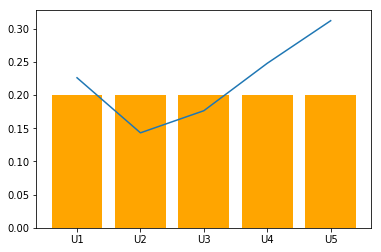

In [670]:
fig = plt.figure()
ax = fig.gca()

ax.bar(labels, pd.value_counts(data.Avg_Use_bin_lbl,sort=False)/data.LIMIT_BAL.count(),color="orange")
ax.plot(labels,bad_rate)

plt.show()

### Rebinning of Avg_Utilisation
(-0.0001, 0.01785]    <br>
(0.01785, 0.1343]     <br>
(0.1343, 0.4518]      <br>
(0.4518, 0.7582]      <br>
(0.7582, 5.3643]      <br>      

In [671]:
bins=[-0.0001,0.1343,0.4518,0.7582,5.3644]
lbls=["UT1","UT2","UT3","UT4"]
Bills["Avg_Use_bins2"]=pd.cut(Bills.Avg_Use,bins,lbls)
Bills["Avg_Use_bins2_lbl"]=pd.cut(Bills.Avg_Use,bins,duplicates="drop",labels=lbls)
data["Avg_Use_bins2"]=Bills["Avg_Use_bins2"]
data["Avg_Use_bins2_lbl"]=Bills["Avg_Use_bins2_lbl"]

In [672]:
Pop_counts=Bills["Avg_Use_bins2"].value_counts(sort=False)
default=data[data.Default==1]
default_counts_bins=default.Avg_Use_bins2.value_counts(sort=False)
bad_rate=default_counts_bins/Pop_counts

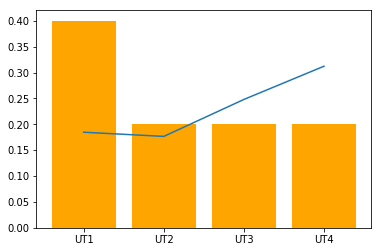

In [673]:
fig = plt.figure()
ax = fig.gca()

ax.bar(lbls, Pop_counts/Tot_counts,color="orange")
ax.plot(lbls,bad_rate)

plt.show()

### Binning based on Amount Paid for statement

In [674]:
paid=data.iloc[:,18:24]
billamt=data.iloc[:,12:18]

paid.columns=["C1","C2","C3","C4","C5","C6"]
billamt.columns=paid.columns

In [675]:
paidperc=paid/billamt

paidperc.head(3)

,C1,C2,C3,C4,C5,C6
0,0.000000,0.222115,0.000000,NaN,NaN,NaN
1,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
2,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564


In [676]:
Tot_percpaid=paid.apply(sum,axis=1)/billamt.apply(sum,axis=1)
Tot_percpaid.head(3)

0    0.089434
1    0.292791
2    0.108388
dtype: float64

In [677]:
# Tot_percpaid.fillna(1,inplace=True)## replaced 0/0 as 1

In [678]:
# pd.value_counts(data.loc[Tot_percpaid.isna(),"Default"])

In [679]:
Tot_percpaid.head(3)

0    0.089434
1    0.292791
2    0.108388
dtype: float64

In [680]:
data["Tot_percpaid"]=Tot_percpaid
lbls=["P1","P2","P3","P4","P5"]
data["Tot_percpaid_lbl"]=pd.qcut(data.Tot_percpaid, q=5,precision=4,duplicates="drop",labels=lbls)
data["Tot_percpaid_bin"]=pd.qcut(data.Tot_percpaid, q=5,precision=4,duplicates="drop")

In [681]:
# data["Tot_percpaid_bin"]=data["Tot_percpaid_bin"].astype(str)

In [682]:
# data.groupby(by="Tot_percpaid_bin",as_index=False).agg({"Default":["count","sum"]})
# .agg({"Default":["count","sum"]})

In [683]:
default=data[data.Default==1]
Pop_counts=pd.value_counts(data.Tot_percpaid_bin,sort=False)
default_counts_bins=pd.value_counts(default.Tot_percpaid_bin,sort=False)
bad_rate=default_counts_bins/Pop_counts

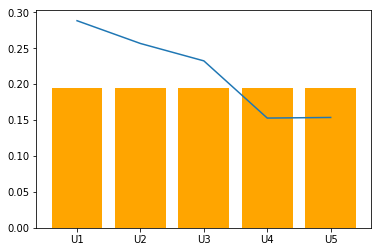

In [684]:
fig = plt.figure()
ax = fig.gca()

ax.bar(labels, Pop_counts/Tot_counts,color="orange")
ax.plot(labels,bad_rate)

plt.show()

### Payment Status

In [685]:
payment=data.iloc[:,6:12]

In [686]:
for col in range(payment.shape[1]):
    payment.iloc[:,col]=payment.iloc[:,col].apply(lambda x:1 if ( x > 0) else 0 )

In [687]:
payment["Delay"]=payment.apply(sum,axis=1)

In [688]:
payment.head(3)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Delay
0,1,1,0,0,0,0,2
1,0,1,0,0,0,1,2
2,0,0,0,0,0,0,0


In [689]:
payment["Delay"].value_counts(sort=False)/Tot_counts

0    0.664367
1    0.147533
2    0.063300
3    0.038467
4    0.031700
5    0.009933
6    0.044700
Name: Delay, dtype: float64

In [690]:
payment["Delay_bin"]="0"
payment.loc[(payment.Delay==1),"Delay_bin"]="1"
payment.loc[(payment.Delay==2) | (payment.Delay==3),"Delay_bin"]="2_3"
payment.loc[(payment.Delay==4) | (payment.Delay==5)| (payment.Delay==6),"Delay_bin"]="4_6"

In [691]:
data["Delay_bin"]=payment["Delay_bin"]

In [692]:
default=data[data.Default==1]
Pop_counts=pd.value_counts(data.Delay_bin,sort=False)
default_counts_bins=pd.value_counts(default.Delay_bin,sort=False)
bad_rate=default_counts_bins/Pop_counts

In [693]:
pd.value_counts(default.Delay_bin,sort=False)/pd.value_counts(data.Delay_bin,sort=False)

0      0.117104
1      0.298238
2_3    0.433344
4_6    0.640541
Name: Delay_bin, dtype: float64

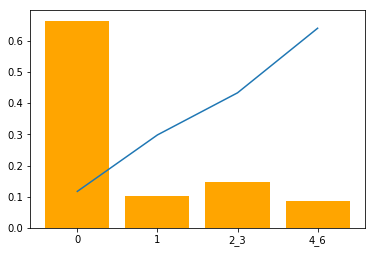

In [694]:
fig = plt.figure()
ax = fig.gca()

ax.bar(["0","1","2_3","4_6"], Pop_counts/Tot_counts,color="orange")
ax.plot(["0","1","2_3","4_6"],bad_rate)

plt.show()

### Final Dataset

In [695]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'LIMIT_BAL_bin', 'LIMIT_BAL_bin_lbl', 'Age_bin_lbl', 'Age_bin',
       'Age_bin2_lbl', 'Age_bin2', 'Edu', 'Avg_Use_bin', 'Avg_Use_bin_lbl',
       'Avg_Use_bins2', 'Avg_Use_bins2_lbl', 'Tot_percpaid',
       'Tot_percpaid_lbl', 'Tot_percpaid_bin', 'Delay_bin'],
      dtype='object')

In [699]:
final_data=data[['LIMIT_BAL_bin', 'LIMIT_BAL_bin_lbl', 'Age_bin_lbl', 'Age_bin',
       'Age_bin2_lbl', 'Age_bin2', 'Edu', 'Avg_Use_bin', 'Avg_Use_bin_lbl',
       'Avg_Use_bins2', 'Avg_Use_bins2_lbl', 'Tot_percpaid_lbl',
       'Tot_percpaid_bin','Delay_bin','Default']].copy()

In [700]:
for col in final_data.columns[final_data.columns!="Default"]:
    final_data.loc[:,col]=final_data[col].astype(str)

In [702]:
final_data.dtypes

LIMIT_BAL_bin        object
LIMIT_BAL_bin_lbl    object
Age_bin_lbl          object
Age_bin              object
Age_bin2_lbl         object
Age_bin2             object
Edu                  object
Avg_Use_bin          object
Avg_Use_bin_lbl      object
Avg_Use_bins2        object
Avg_Use_bins2_lbl    object
Tot_percpaid_lbl     object
Tot_percpaid_bin     object
Delay_bin            object
Default               int64
dtype: object

In [703]:
final_data.to_pickle("final_data.pkl")